<a href="https://colab.research.google.com/github/JuniorTorresMTJ/-Exercises-_of_Python/blob/master/notebook/An%C3%A1lise_e_Previs%C3%A3o_de_S%C3%A9ries_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [42]:
url = 'https://github.com/JuniorTorresMTJ/Bootcamp_Data_Science_Aplicada_Alura/blob/main/dados/Modulo3/dados_covid_sp.zip?raw=true'

In [43]:
dados = pd.read_csv(url, sep=';', compression='zip')
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [44]:
dados['datahora'] = pd.to_datetime(dados['datahora'], format = '%Y-%m-%d')

In [45]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)

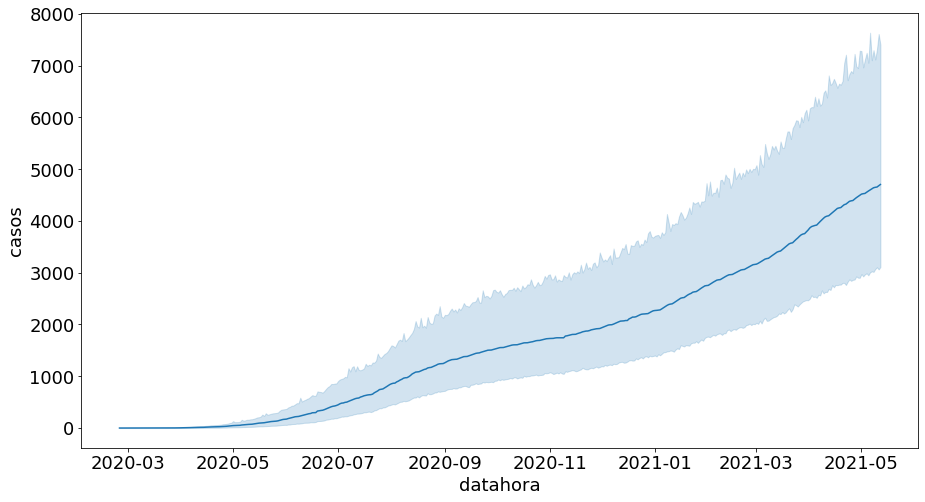

In [46]:
sns.lineplot(x='datahora', y ='casos', data = dados)

In [47]:
eixo_x = np.linspace(-2,2,100)

In [48]:
y_exp = np.exp(eixo_x)

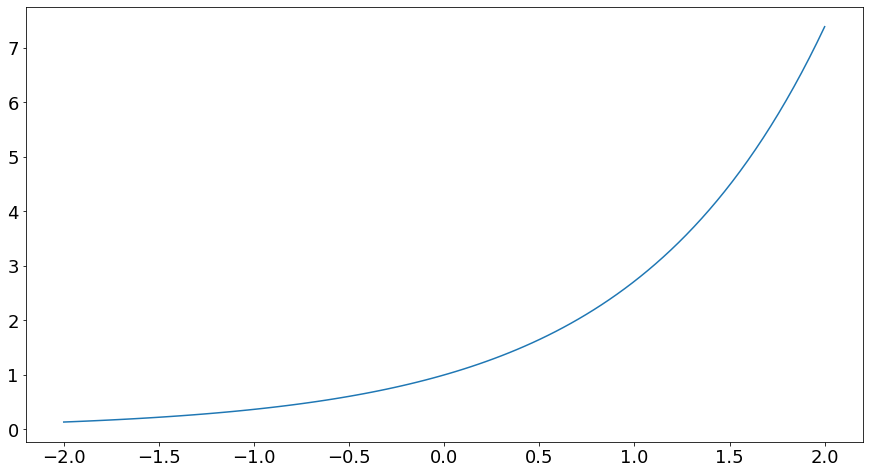

In [49]:
sns.lineplot(x=eixo_x, y=y_exp)

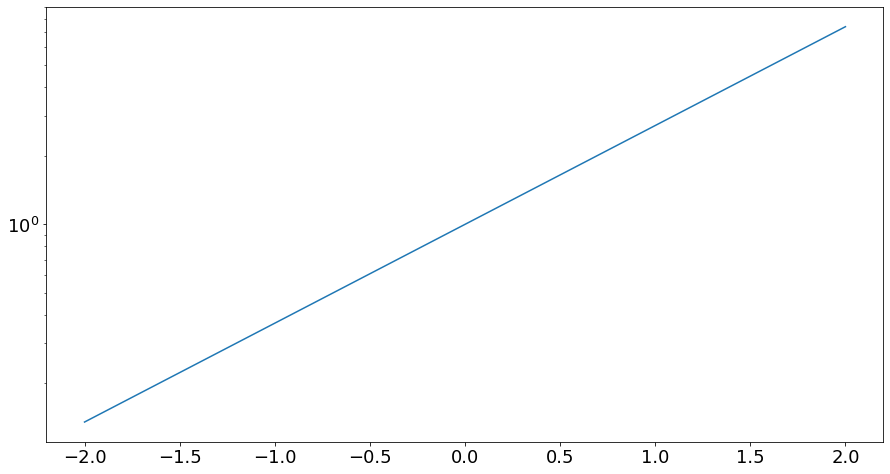

In [50]:
sns.lineplot(x=eixo_x, y=y_exp)
mpl.pyplot.yscale('log')

In [51]:
dados_sp = dados.query('nome_munic == "São Paulo"')

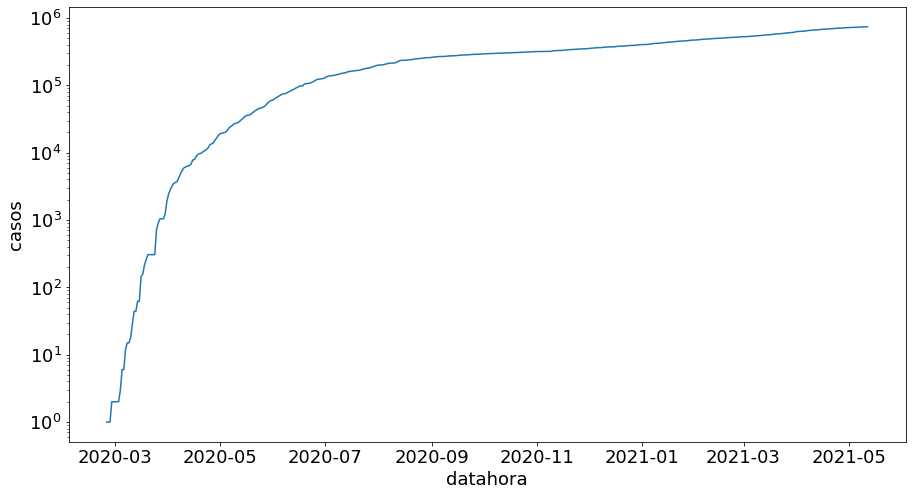

In [52]:
sns.lineplot(x ='datahora', y='casos', data=dados_sp)
mpl.pyplot.yscale('log')

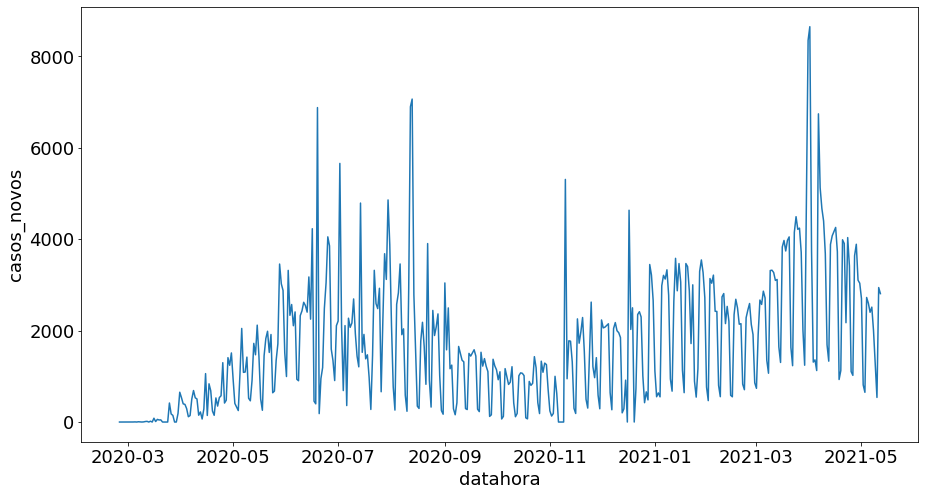

In [53]:
sns.lineplot(x='datahora', y='casos_novos', data = dados_sp)

In [54]:
dados_exemplo = pd.DataFrame(data= np.linspace(1,10,10))
dados_exemplo.head()

,0
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


.diff() = Calculates the difference of a Dataframe element compared with another element in the Dataframe (default is element in previous row).

In [55]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()

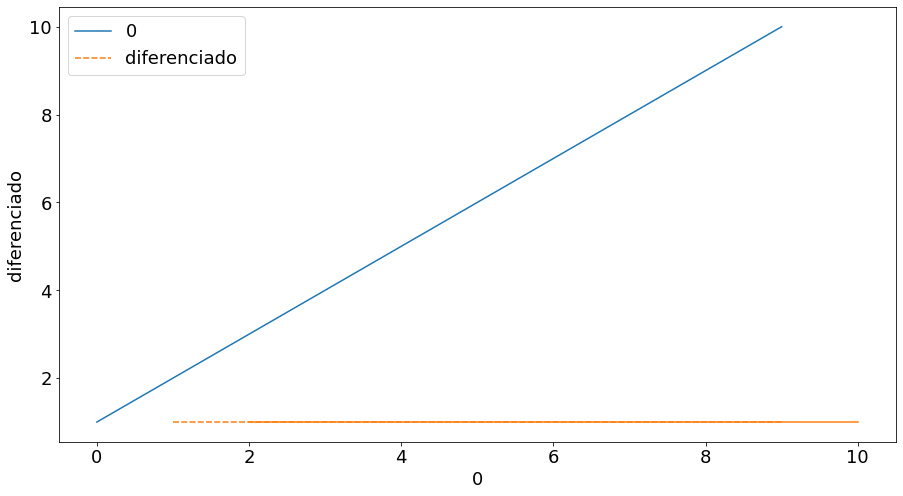

In [56]:
sns.lineplot(data=dados_exemplo)
sns.lineplot(x =0, y=dados_exemplo['diferenciado'],data=dados_exemplo)

In [58]:
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

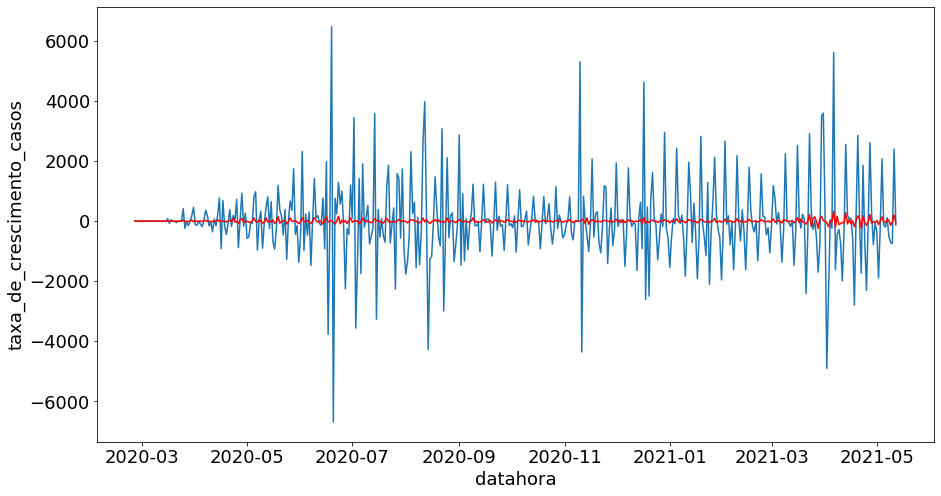

In [65]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data = dados_sp)
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data = dados_sp, color='red')

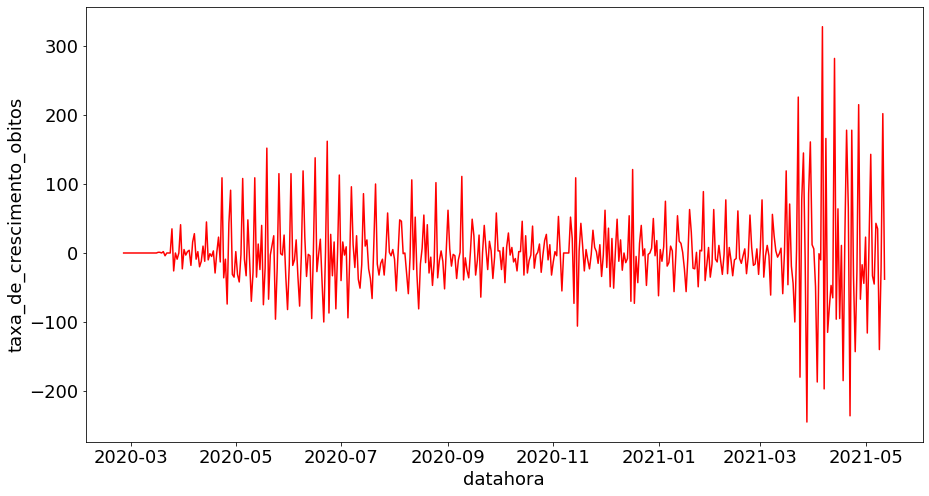

In [64]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data = dados_sp, color='red')

<BarContainer object of 443 artists>

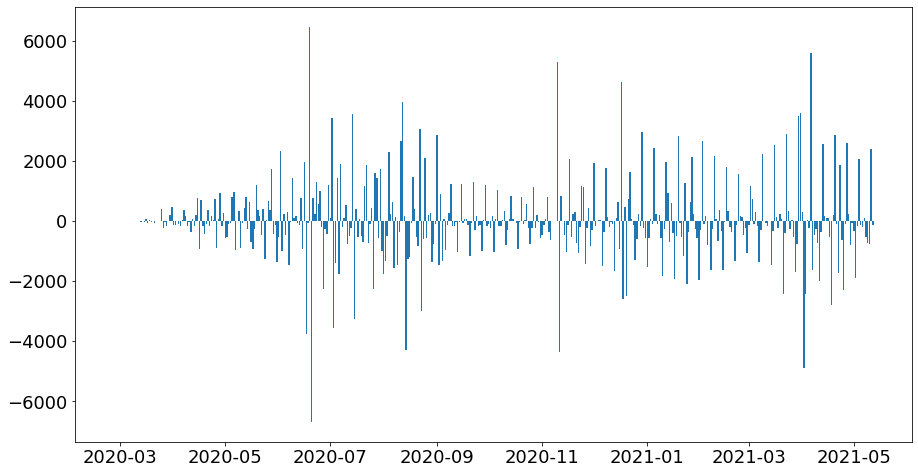

In [67]:
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'])

In [68]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year

In [70]:
dados_2021 = dados_sp.query('ano == 2021')

<BarContainer object of 132 artists>

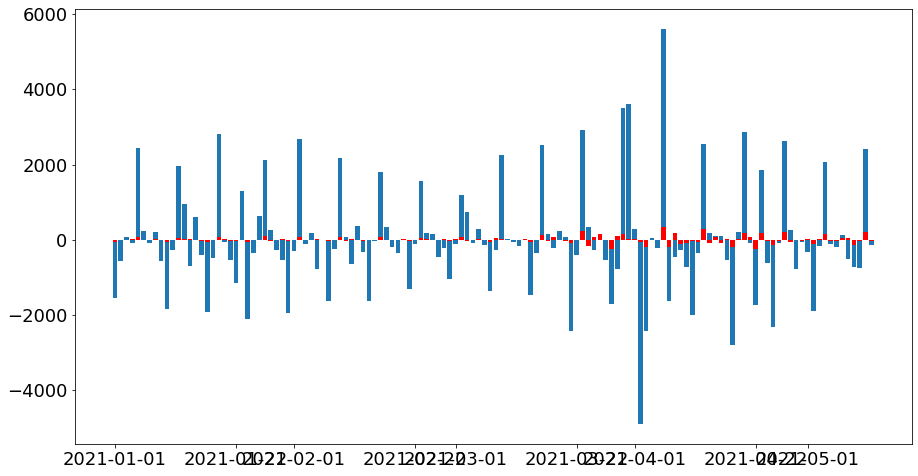

In [74]:
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'])
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_obitos'], color ='red')

In [76]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center = False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center = False).mean()

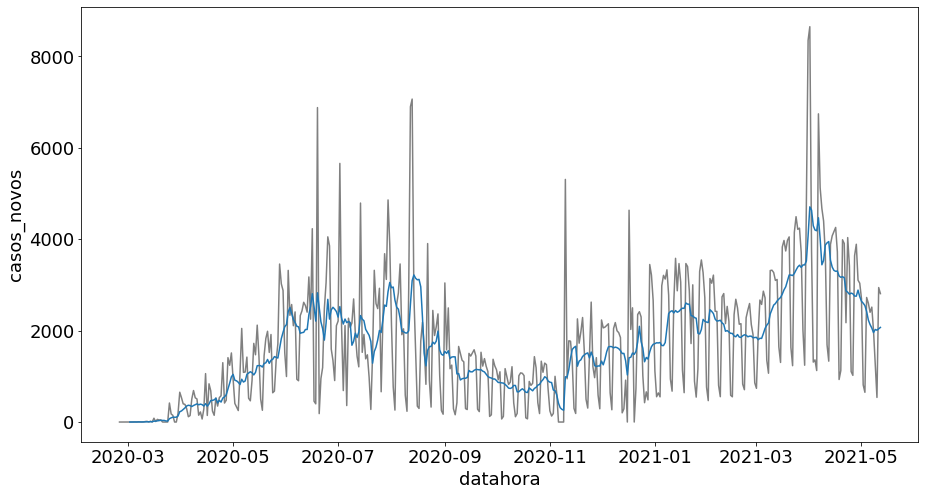

In [82]:
sns.lineplot(x='datahora', y='casos_novos', data = dados_sp, color='grey')
sns.lineplot(x='datahora', y= 'media_movel_casos', data = dados_sp)

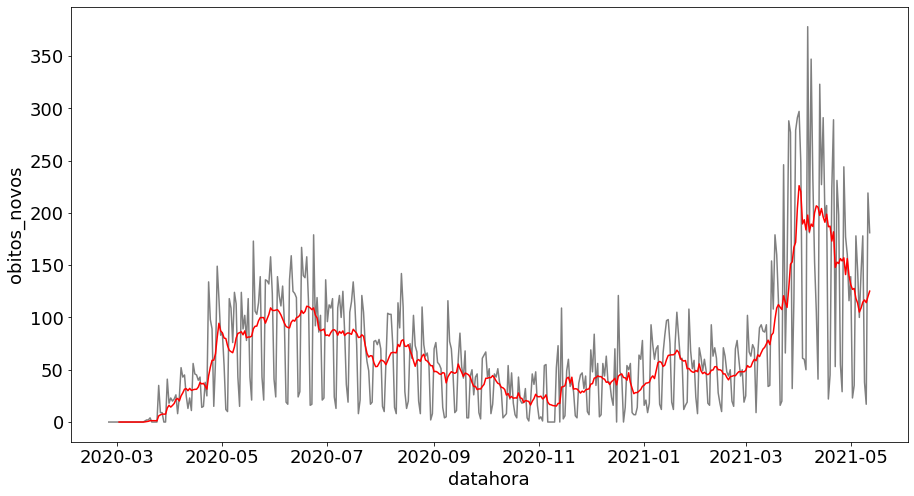

In [83]:
sns.lineplot(x='datahora', y='obitos_novos', data = dados_sp, color = 'grey')
sns.lineplot(x='datahora', y= 'media_movel_obitos', data = dados_sp, color= 'red')